In [16]:
import codecs
import re # 正则表达模块
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as psl
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
def process(path):
    f = codecs.open(path, mode='r', encoding='utf-8')  # 打开txt文件，以‘utf-8'编码读取
    lines = f.readlines()         # 以行的形式进行读取文件
    data = []
    for i in range(len(lines)):
        if lines[i][:9] == 'Iteration':
            data.append(re.findall(r"\d+\.?\d*",lines[i]))
    # print(data)
    for _ in range(3): # 统一第0轮列表的数字
        data[0].insert(1,'0.0')
    # for i in range(len(data)):
    #     data[i] = np.array(data[i])
    return data

1. 固定轮数, 不同防御方法下，攻击性能随恶意客户端比例的变化情况.(MF)

In [18]:
def metric(path_list,epoch=2):
    perform = np.zeros([2,len(path_list)])
    idx = np.arange(1,epoch,1)
    for i in range(len(path_list)):
        data = np.array(process(path_list[i]))
        att_data = data[idx][:,8].astype(float)
        rs_data = data[idx][:,5].astype(float)
        rs_max = max(rs_data)
        perform[0][i] = rs_max
        # perform[0][i] = rs_data[45]
        rs_max_idx = np.where(rs_data == rs_max)[0][-1]
        att_in_rs_max = att_data[rs_max_idx]
        perform[1][i] = att_in_rs_max
        # perform[1][i] = att_data[45]
    return perform

恶意用户比列

In [ ]:
path_base = 'log/ML-100K/attack/ML-100K_NoAttack_NoDefense_0.00.txt'
path0_0 = 'log/ML-100K/target_size/ML-100K_A-approx_NoDefense_0.15_Size10_target3.txt'
path1_0 = 'log/ML-100K/target_size/ML-100K_A-approx_NoDefense_0.15_Size10_target5.txt'
path2_0 = 'log/ML-100K/target_size/ML-100K_A-approx_Regula_0.15_Size10_target3.txt'
path3_0 = 'log/ML-100K/target_size/ML-100K_A-approx_Regula_0.15_Size10_target5.txt'

path0_1 = 'log/ML-100K/target_size/ML-100K_A-pop_NoDefense_0.15_Size50_target3.txt'
path1_1 = 'log/ML-100K/target_size/ML-100K_A-pop_NoDefense_0.15_Size50_target5.txt'
path2_1 = 'log/ML-100K/target_size/ML-100K_A-pop_Regula_0.15_Size50_target3.txt'
path3_1 = 'log/ML-100K/target_size/ML-100K_A-pop_Regula_0.15_Size50_target5.txt'

# path1_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE0e-0_UEA1e-0_0.05.txt'
# path2_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA0e-0_0.05.txt'
# path3_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA1e-0_0.05.txt'

# 设置NumPy的打印选项
np.set_printoptions(suppress=True, precision=2)

path_list0 = [path_base,path0_0,path1_0,path2_0,path3_0]
perform0 = metric(path_list0,epoch=151)
print(np.round(perform0*100,2))

path_list1 = [path0_1,path1_1,path2_1,path3_1]
perform1 = metric(path_list1,epoch=151)
print(np.round(perform1*100,2))

# path_list2 = [path1_2,path2_2,path3_2]
# print(np.round(perform2*100,2))


In [24]:

path_base = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q1.txt'
path0_0 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_NoDefense_p0.05_T1_Size5_correct_size_for_kl-compute.txt'
path1_0 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_NoDefense_p0.05_T2_Size5_correct_size_for_kl-compute.txt'
path2_0 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_NoDefense_p0.05_T3_Size5_correct_size_for_kl-compute.txt'
path3_0 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_NoDefense_p0.05_T4_Size5_correct_size_for_kl-compute.txt'
path4_0 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_NoDefense_p0.05_T5_Size5_correct_size_for_kl-compute.txt'

path0_1 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_Regula_p0.05_T1_Size5_correct_size_for_kl-compute.txt'
path1_1 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_Regula_p0.05_T2_Size5_correct_size_for_kl-compute.txt'
path2_1 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_Regula_p0.05_T3_Size5_correct_size_for_kl-compute.txt'
path3_1 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_Regula_p0.05_T4_Size5_correct_size_for_kl-compute.txt'
path4_1 = 'log/ML-100K/EOT/ML-100K_PIECKIPE_Regula_p0.05_T5_Size5_correct_size_for_kl-compute.txt'


path0_2 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_NoDefense_p0.05_T1_Size50_round3-bn5.txt'
path1_2 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_NoDefense_p0.05_T2_Size50_round3-bn5.txt'
path2_2 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_NoDefense_p0.05_T3_Size50_round3-bn5.txt'
path3_2 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_NoDefense_p0.05_T4_Size50_round3-bn5.txt'
path4_2 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_NoDefense_p0.05_T5_Size50_round3-bn5.txt'

path0_3 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_Regula_p0.05_T1_Size50_round3-bn5.txt'
path1_3 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_Regula_p0.05_T2_Size50_round3-bn5.txt'
path2_3 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_Regula_p0.05_T3_Size50_round3-bn5.txt'
path3_3 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_Regula_p0.05_T4_Size50_round3-bn5.txt'
path4_3 = 'log/ML-100K/EOT/ML-100K_PIECKUEA_Regula_p0.05_T5_Size50_round3-bn5.txt'


path0_4 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKIPE-repeat_NoDefense_p0.05_T3_Size15_correct_size_for_kl-compute.txt'
path1_4 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKIPE-repeat_Regula_p0.05_T3_Size15_correct_size_for_kl-compute.txt'
path2_4 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKIPE-repeat_NoDefense_p0.05_T5_Size15_correct_size_for_kl-compute.txt'
path3_4 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKIPE-repeat_Regula_p0.05_T5_Size15_correct_size_for_kl-compute.txt'

path0_5 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKUEA-repeat_NoDefense_p0.05_T3_Size250_round3-bn5.txt'
path1_5 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKUEA-repeat_Regula_p0.05_T3_Size250_round3-bn5.txt'
path2_5 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKUEA-repeat_NoDefense_p0.05_T5_Size250_round3-bn5.txt'
path3_5 = 'log/ML-100K/EOT/other_stra/ML-100K_PIECKUEA-repeat_Regula_p0.05_T5_Size250_round3-bn5.txt'


# 设置NumPy的打印选项
np.set_printoptions(suppress=True, precision=2)

path_list0 = [path_base,path0_0,path1_0,path2_0,path3_0,path4_0]
perform0 = metric(path_list0,epoch=151)
print(np.round(perform0*100,2))

path_list1 = [path0_1,path1_1,path2_1,path3_1,path4_1]
perform1 = metric(path_list1,epoch=151)
print(np.round(perform1*100,2))

path_list2 = [path0_2,path1_2,path2_2,path3_2,path4_2]
perform2 = metric(path_list2,epoch=151)
print(np.round(perform2*100,2))

path_list3 = [path0_3,path1_3,path2_3,path3_3,path4_3]
perform3 = metric(path_list3,epoch=151)
print(np.round(perform3*100,2))

path_list4 = [path0_4,path1_4,path2_4,path3_4]
perform4 = metric(path_list4,epoch=151)
print(np.round(perform4*100,2))

path_list5 = [path0_5,path1_5,path2_5,path3_5]
perform5 = metric(path_list5,epoch=151)
print(np.round(perform5*100,2))
# path_list2 = [path1_2,path2_2,path3_2]
# print(np.round(perform2*100,2))


[[57.16 57.05 57.58 57.48 57.16 56.84]
 [ 0.23 77.68 75.61 57.09 39.55 32.7 ]]
[[57.37 57.48 58.01 57.9  58.22]
 [ 0.8   0.8   0.46  0.05  0.02]]
[[57.69 57.05 57.05 56.73 56.31]
 [94.76 92.72 87.33 85.24 81.84]]
[[54.51 56.2  57.69 58.11 58.22]
 [ 0.34  0.    0.    0.13  0.13]]
[[57.26 57.58 56.73 58.01]
 [59.16  0.21 54.76  2.33]]
[[57.9  58.43 57.69 58.32]
 [93.93  0.5  97.65  0.34]]


In [90]:
path_base1 = 'log/ML-100K/Dynamiclr/ML-100K_NoAttack_NoDefense_clientlr1e-2_q.txt'
path_base2 = 'log/ML-100K/Dynamiclr/ML-100K_NoAttack_NoDefense_clientlr0.0-1e-2-1e-0_q.txt'

path0_0 = 'log/ML-100K/Dynamiclr/ML-100K_PIECKIPE_NoDefense_p0.05_clientlr1e-2_Size10.txt'
path1_0 = 'log/ML-100K/Dynamiclr/ML-100K_PIECKIPE_NoDefense_p0.05_clientlr0.0-1e-2-1e-0_Size10.txt'
path2_0 = 'log/ML-100K/Dynamiclr/ML-100K_PIECKUEA_NoDefense_p0.05_clientlr1e-2_Size50_round3-bn5.txt'
path3_0 = 'log/ML-100K/Dynamiclr/ML-100K_PIECKUEA_NoDefense_p0.05_clientlr0.0-1e-2-1e-0_Size50_round3-bn5.txt'



# 设置NumPy的打印选项
np.set_printoptions(suppress=True, precision=2)

path_list0 = [path0_0,path1_0,path2_0,path3_0]
perform0 = metric(path_list0,epoch=101)
print(np.round(perform0*100,2))


path_base = [path_base1,path_base2]
perform2 = metric(path_base,epoch=101)
print(np.round(perform2*100,2))


[[47.51 22.16 46.24 21.95]
 [93.96 55.13 90.89 55.69]]
[[47.83 21.74]
 [ 0.    0.  ]]


In [8]:
path0_0 = 'log/ML-100K/BPR/ML-100K_NoAttack_NoDefense_BPR.txt'
path1_0 = 'log/ML-100K/BPR/ML-100K_PIECKIPE_NoDefense_p0.05_Size10.txt'
path2_0 = 'log/ML-100K/BPR/ML-100K_PIECKUEA_NoDefense_p0.05_Size50_round10-bn5.txt'
path3_0 = 'log/ML-100K/BPR/ML-100K_PIECKIPE_Regula-exp_ipemu1.25e-0_ueamu1.25e-0_p0.05_Size10.txt'
path4_0 = 'log/ML-100K/BPR/ML-100K_PIECKUEA_Regula-exp_ipemu1.15e-0_ueamu1.15e-0_p0.05_Size50_round10-bn5.txt'
path5_0 = 'log/ML-100K/BPR/ML-100K_PIECKIPE_Regula-exp_ipemu1.15e-0_ueamu1.15e-0_p0.05_Size10.txt'
path6_0 = 'log/ML-100K/BPR/ML-100K_PIECKUEA_Regula-exp_ipemu1.25e-0_ueamu1.25e-0_p0.05_Size50_round10-bn5.txt'



# 设置NumPy的打印选项
np.set_printoptions(suppress=True, precision=2)

path_list0 = [path0_0,path1_0,path2_0,path3_0,path4_0,path5_0,path6_0]
perform0 = metric(path_list0,epoch=151)
print(np.round(perform0*100,2))



[[57.26 57.48 56.95 54.08 53.45 54.08 52.92]
 [ 0.   83.14 90.21  4.67  0.   26.54  0.11]]


In [4]:
path_base0 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q1.txt'
path_base1 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q2.txt'
path_base2 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q3.txt'
path_base3 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q4.txt'
path_base4 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q5.txt'
path_base5 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q6.txt'
path_base6 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q7.txt'
path_base7 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q8.txt'
path_base8 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q9.txt'
path_base9 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q10.txt'
path_base10 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q11.txt'
path_base11 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q12.txt'
path_base12 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q13.txt'
path_base13 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q14.txt'
path_base14 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q15.txt'
path_base15 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q16.txt'


# path0_0 = 'log/ML-100K/sample_ratio/ML-100K_A-approx_NoDefense_0.05_Size10_sample_ratio10_server1e-0_client1e-0.txt'
# path1_0 = 'log/ML-100K/sample_ratio/ML-100K_A-approx_Regula_0.05_Size10_sample_ratio10_server1e-0_client1e-0.txt'
# path2_0 = 'log/ML-100K/sample_ratio/ML-100K_A-pop_NoDefense_0.05_Size5_sample_ratio10_server1e-0_client1e-0.txt'
# path3_0 = 'log/ML-100K/sample_ratio/ML-100K_A-pop_Regula_0.05_Size5_sample_ratio10_server1e-0_client1e-0.txt'

# path0_1 = 'log/ML-100K/sample_ratio/ML-100K_A-approx_NoDefense_0.05_Size10_sample_ratio15_server1e-0_client1e-0.txt'
# path1_1 = 'log/ML-100K/sample_ratio/ML-100K_A-approx_Regula_0.05_Size10_sample_ratio15_server1e-0_client1e-0.txt'
# path2_1 = 'log/ML-100K/sample_ratio/ML-100K_A-pop_NoDefense_0.05_Size5_sample_ratio15_server1e-0_client1e-0.txt'
# path3_1 = 'log/ML-100K/sample_ratio/ML-100K_A-pop_Regula_0.05_Size5_sample_ratio15_server1e-0_client1e-0.txt'

# path1_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE0e-0_UEA1e-0_0.05.txt'
# path2_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA0e-0_0.05.txt'
# path3_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA1e-0_0.05.txt'

# 设置NumPy的打印选项
# np.set_printoptions(suppress=True, precision=2)

# path_list0 = [path0_0,path1_0,path2_0,path3_0]
# perform0 = metric(path_list0,epoch=151)
# print(np.round(perform0*100,2))

# path_list1 = [path0_1,path1_1,path2_1,path3_1]
# perform1 = metric(path_list1,epoch=151)
# print(np.round(perform1*100,2))

path_base = [path_base0,path_base1,path_base2,path_base3,path_base4,path_base5,path_base6,path_base7,
             path_base8,path_base9,path_base10,path_base11,path_base12,path_base13,path_base14,path_base15]
perform2 = metric(path_base,epoch=151)
print(np.round(perform2*100,2))


[[57.16 60.45 62.14 61.4  60.98 62.04 61.4  59.7  59.49 57.26 57.05 55.99
  55.57 55.67 53.34 52.7 ]
 [ 0.23  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]]


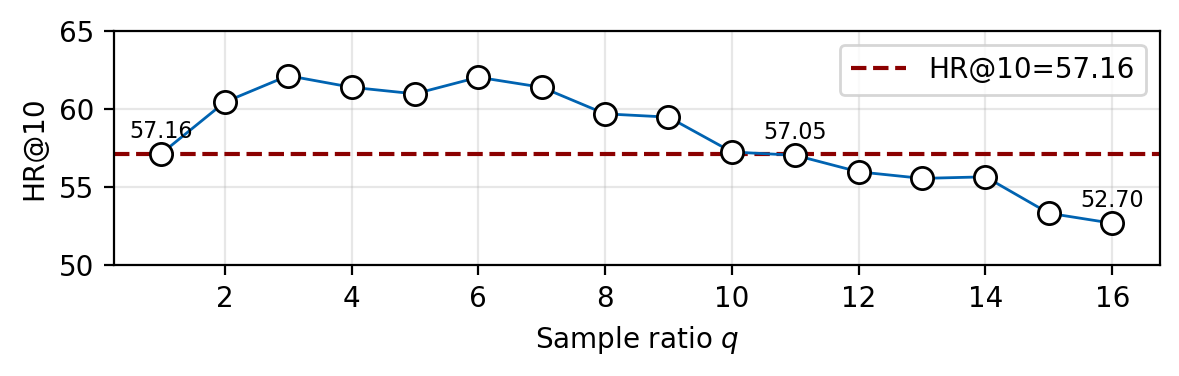

In [7]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(6, 2))

x = np.arange(1,17,1)
y = [57.16, 60.45, 62.14, 61.4, 60.98, 62.04, 61.4, 59.7,  59.49, 57.26, 57.05, 55.99, 55.57, 55.67, 53.34, 52.7]

plt.axhline(y=57.16, color='#8B0000', linewidth=1.5, linestyle='--', label='HR@10=57.16')
plt.plot(x, y, color='#0063B1', linewidth=1, linestyle='-', marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white')

plt.ylim(50, 65)
plt.xlabel('Sample ratio $q$')
plt.ylabel('HR@10')
plt.grid(alpha=0.3)

# 添加标签
for i in range(len(x)):
    if x[i] in [1, 11, 16]:
        plt.text(x[i], y[i]+0.7, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=8, color='black')
# 显示图例
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("attack_q.pdf")


In [48]:
path_base0 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q1.txt'
path_base1 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q10.txt'
path_base2 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q11.txt'
path_base3 = 'log/ML-100K/EOQ/ML-100K_NoAttack_NoDefense_q12.txt'
path0_1 = 'log/ML-100K/EOQ/ML-100K_PIECKIPE_NoDefense_p0.05_q10_Size10.txt'
path0_2 = 'log/ML-100K/EOQ/ML-100K_PIECKUEA_NoDefense_p0.05_q10_Size15_round3-bn5.txt'
path0_3 = 'log/ML-100K/EOQ/ML-100K_PIECKIPE_Regula_p0.05_q10_Size10.txt'
path0_4 = 'log/ML-100K/EOQ/ML-100K_PIECKUEA_Regula_p0.05_q10_Size15_round3-bn5.txt'
path_base = [path_base0,path_base1,path_base2,path_base3,path0_1,path0_2,path0_3,path0_4]
perform2 = metric(path_base,epoch=151)
print(np.round(perform2*100,2))


[[57.16 57.26 57.05 55.99 57.58 57.79 55.99 54.51]
 [ 0.23  0.    0.    0.   30.75 89.86  1.03  0.68]]


In [33]:
NoAttack_HR

[0.23, 0.0, 0.0, 0.0]

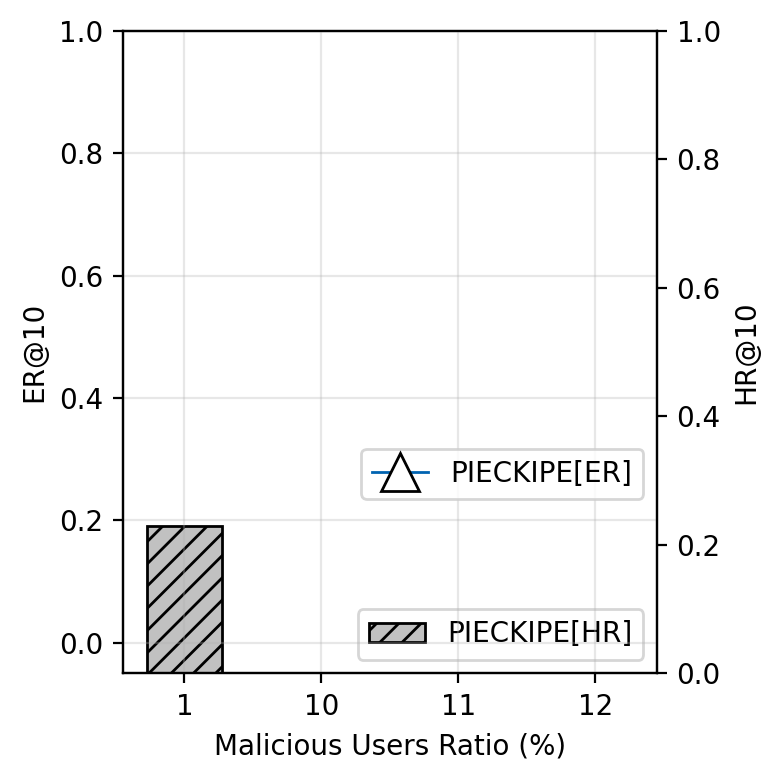

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经定义了perform4和perform5数组
NoAttack_ER = [57.16, 57.26, 57.05, 55.99 ]
NoAttack_HR = [0.23,  0.,    0.,    0. ]
x_labels = [1, 10, 11, 12]

# Define the range and number of data points
start_val = 1
end_val = 15
num_points = 4

# Create an equally spaced array of data points
x_values = np.linspace(start_val, end_val, num_points)

# x轴标签仍保持为1、5、10和15
x_labels = [1, 10, 11, 12]

# noattack_hr = 0.5716

fig, ax1 = plt.subplots(figsize=(4, 4))

# Plot HR
bar_width = 2
ax2 = ax1.twinx()
ax2.bar(x_values, NoAttack_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='///', align='center', label='PIECKIPE[HR]')
ax2.set_ylabel("HR@10")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.0))
ax2.set_ylim(-0.0, 1.00)

# Plot ER
ax1.plot(x_values, NoAttack_ER, color='#0063B1', linewidth=1, linestyle='-', marker='^', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='PIECKIPE[ER]')
ax1.set_xlabel("Malicious Users Ratio (%)")
ax1.set_ylabel("ER@10")
ax1.set_xticks(x_values)  # 使用x_values作为x轴的数据点
ax1.set_xticklabels(x_labels)  # 使用x_labels作为x轴的标签
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.25), labelspacing=0.7)
ax1.set_ylim(-0.05, 1.00)

# Move ER plot and legend to the foreground
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

ax1.grid(alpha=0.3)
# ax2.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("attack_q.pdf")
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

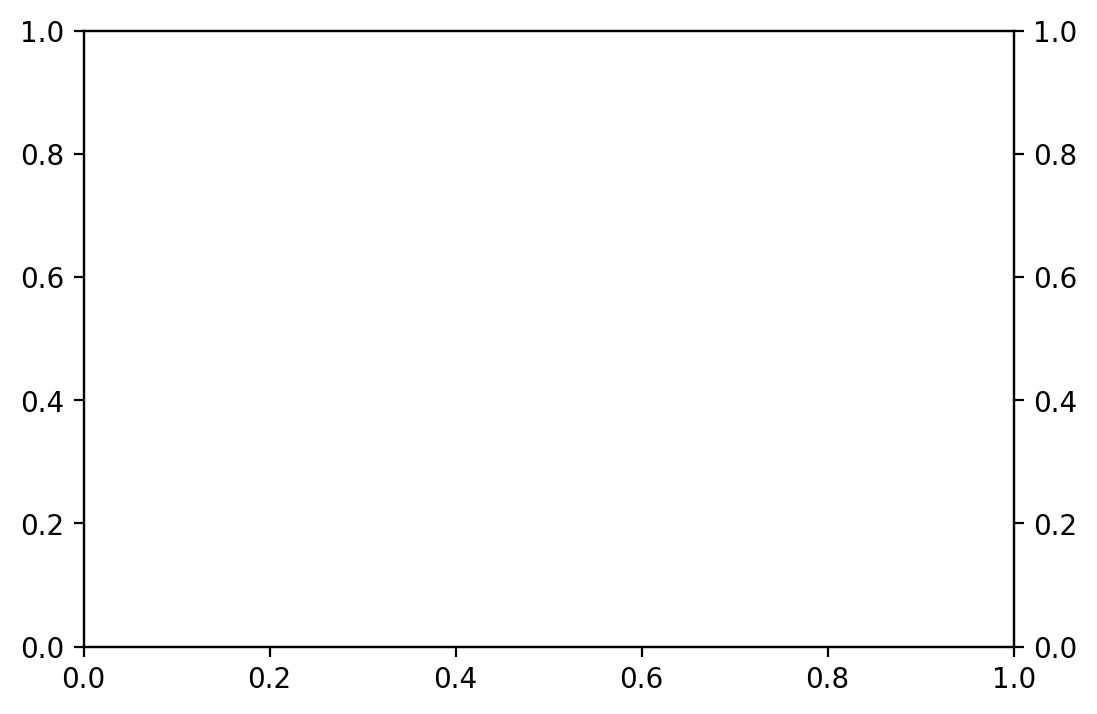

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经定义了perform4和perform5数组
NoAttack_HR = [0.5716, 0.5726, 0.5705, 0.5599, 0.5324]
NoAttack_ER = [0.0023, 0.,    0.,    0.,  0.0]
x_labels = [1, 10, 11, 12, 15]

# Define the range and number of data points
start_val = 1
end_val = 20
num_points = 4

# Create an equally spaced array of data points
x_values = np.linspace(start_val, end_val, num_points)

# x轴标签仍保持为1、10、11和12
# x_labels = [1, 10, 11, 12]

fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot HR
bar_width = 2
ax2 = ax1.twinx()
ax2.bar(x_values, NoAttack_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='///', align='center', label='NoAttack[HR]')
ax2.set_ylabel("HR@10", fontsize=12)
ax2.set_ylim(-0.0, 0.6)

# Plot ER
ax1.plot(x_values, NoAttack_ER, color='#0063B1', linewidth=1, linestyle='-', marker='^', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='NoAttack[ER]')
ax1.set_xlabel("Malicious Users Ratio (%)", fontsize=12)
ax1.set_ylabel("ER@10", fontsize=12)
ax1.set_xticks(x_values)  # 使用x_values作为x轴的数据点
ax1.set_xticklabels(x_labels, fontsize=10)  # 使用x_labels作为x轴的标签
ax1.set_ylim(-0.05, 1.00)

# Move ER plot and legend to the foreground
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

# 同时显示两个y轴的图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
handles = lines1 + lines2
labels = labels1 + labels2
legend = ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1.0), fontsize=10, labelspacing=0.7)

ax1.grid(alpha=0.3)
plt.tight_layout()
plt.show()


BPR

In [ ]:
path_base0 = 'log/ML-100K/attack/ML-100K_NoAttack_NoDefense_0.00.txt'
path_base1 = 'log/ML-100K/bpr/ML-100K_NoAttack_NoDefense_0.0_Size0_target1_server1e-0_client1e-0_bpr.txt'

path0_0 = 'log/ML-100K/bpr/ML-100K_A-pop-regabs_NoDefense_0.05_Size50_target1_server1e-0_client1e-0_bpr.txt'
path1_0 = 'log/ML-100K/bpr/ML-100K_A-pop-regabs_Regula-exp-s10_0.05_Size50_target1_server1e-0_client1e-0_bpr_ipe0.5e+0_uea1.0e+0.txt'
path2_0 = 'log/ML-100K/bpr/ML-100K_A-pop-regabs_Regula-exp-s10_0.05_Size50_target1_server1e-0_client1e-0_bpr_ipe1e+0_uea2e+0.txt'
path3_0 = 'log/ML-100K/bpr/ML-100K_A-pop-regabs_Regula-exp-s10_0.05_Size50_target1_server1e-0_client1e-0_bpr_ipe0.5e+0_uea1.5e+0.txt'
path4_0 = 'log/ML-100K/bpr/ML-100K_A-pop-regabs_Regula-exp-s10_0.05_Size50_target1_server1e-0_client1e-0_bpr_ipe0.8e+0_uea2.0e+0.txt'

path0_1 = 'log/ML-100K/bpr/ML-100K_A-approx-regabs_NoDefense_0.05_Size10_target1_server1e-0_client1e-0_bpr.txt'
path1_1 = 'log/ML-100K/bpr/ML-100K_A-approx-regabs_Regula-exp-s10_0.05_Size10_target1_server1e-0_client1e-0_bpr_ipe0.5e+0_uea1.0e+0.txt'
path2_1 = 'log/ML-100K/bpr/ML-100K_A-approx-regabs_Regula-exp-s10_0.05_Size10_target1_server1e-0_client1e-0_bpr_ipe1e+0_uea2e+0.txt'
path3_1 = 'log/ML-100K/bpr/ML-100K_A-approx-regabs_Regula-exp-s10_0.05_Size10_target1_server1e-0_client1e-0_bpr_ipe0.5e+0_uea1.5e+0.txt'
path4_1 = 'log/ML-100K/bpr/ML-100K_A-approx-regabs_Regula-exp-s10_0.05_Size10_target1_server1e-0_client1e-0_bpr_ipe0.8e+0_uea2.0e+0.txt'

# path1_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE0e-0_UEA1e-0_0.05.txt'
# path2_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA0e-0_0.05.txt'
# path3_2 = 'log/ML-100K/EOMu/ML-100K_A-hum_Size10_Regula_Regusize10_IPE1e-0_UEA1e-0_0.05.txt'

# 设置NumPy的打印选项
np.set_printoptions(suppress=True, precision=2)

path_base = [path_base0,path_base1]
perform_base = metric(path_base,epoch=151)
print(np.round(perform_base*100,2))

path_list0 = [path0_0,path1_0,path2_0,path3_0,path4_0]
perform0 = metric(path_list0,epoch=151)
print(np.round(perform0*100,2))

path_list1 = [path0_1,path1_1,path2_1,path3_1,path4_1]
perform1 = metric(path_list1,epoch=151)
print(np.round(perform1*100,2))


In [ ]:
from tabulate import tabulate

# Data (assuming the data is multiplied by 100 before this step)
data = [
    ["Method", "HR@10 (UEA)", "ER@10 (UEA)", "HR@10 (IPE)", "ER@10 (IPE)", "HR@10 (Our)", "ER@10 (Our)"],
    ["PIECKIPE", PIECKIPE_HR[0]*100, PIECKIPE_ER[0]*100, PIECKIPE_HR[1]*100, PIECKIPE_ER[1]*100, PIECKIPE_HR[2]*100, PIECKIPE_ER[2]*100],
    ["PIECKUEA", PIECKUEA_HR[0]*100, PIECKUEA_ER[0]*100, PIECKUEA_HR[1]*100, PIECKUEA_ER[1]*100, PIECKUEA_HR[2]*100, PIECKUEA_ER[2]*100]
]

# Generate the LaTeX table
latex_table = tabulate(data, tablefmt="latex", floatfmt=".2f")

# Print the LaTeX table
print(latex_table)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经定义了perform4和perform5数组
PIECKIPE_ER = perform0[1]
PIECKIPE_HR = perform0[0]
PIECKUEA_ER = perform1[1]
PIECKUEA_HR = perform1[0]

# Define the range and number of data points
start_val = 1
end_val = 15
num_points = 4

# Create an equally spaced array of data points
x_values = np.linspace(start_val, end_val, num_points)

# x轴标签仍保持为1、5、10和15
x_labels = ['UEA', 'IPE', 'Our']

noattack_hr = 0.5716

fig, ax1 = plt.subplots(figsize=(4, 4))

# Plot HR
bar_width = 1
ax2 = ax1.twinx()
ax2.bar(np.subtract(x_values, bar_width/2), PIECKIPE_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='///', align='center', label='PIECKIPE[HR]')
ax2.bar(np.add(x_values, bar_width/2), PIECKUEA_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='O', align='center', label='PIECKUEA[HR]')
ax2.set_ylabel("HR@10")
ax2.axhline(y=noattack_hr, color='#8B0000', linewidth=1.5, linestyle='--', label='NoAttack[HR]')
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.57))
ax2.set_ylim(-0.0, 1.00)

# Plot ER
ax1.plot(x_values, PIECKIPE_ER, color='#0063B1', linewidth=1, linestyle='-', marker='^', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='PIECKIPE[ER]')
ax1.plot(x_values, PIECKUEA_ER, color='#0063B1', linewidth=1, linestyle='-', marker='o', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='PIECKUEA[ER]')
ax1.set_xlabel("Malicious Users Ratio (%)")
ax1.set_ylabel("ER@10")
ax1.set_xticks(x_values)  # 使用x_values作为x轴的数据点
ax1.set_xticklabels(x_labels)  # 使用x_labels作为x轴的标签
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.82), labelspacing=0.7)
ax1.set_ylim(-0.05, 1.00)

# Move ER plot and legend to the foreground
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

ax1.grid(alpha=0.3)
# ax2.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("defense_p_mf_ml-100k.pdf")
plt.show()


流行项目集合数

In [ ]:
path1_4 = 'log/ML-100K/EON/ML-100K_A-approx_Size10_Regula_Regusize5_IPE1e-0_UEA1e-0_0.05.txt'
path2_4 = 'log/ML-100K/EON/ML-100K_A-approx_Size10_Regula_Regusize10_IPE1e-0_UEA1e-0_0.05.txt'
path3_4 = 'log/ML-100K/EON/ML-100K_A-approx_Size10_Regula_Regusize50_IPE1e-0_UEA1e-0_0.05.txt'
path4_4 = 'log/ML-100K/EON/ML-100K_A-approx_Size10_Regula_Regusize250_IPE1e-0_UEA1e-0_0.05.txt'

path1_5 = 'log/ML-100K/EON/ML-100K_A-pop_Size50_Regula_Regusize5_IPE1e-0_UEA1e-0_0.05.txt'
path2_5 = 'log/ML-100K/EON/ML-100K_A-pop_Size50_Regula_Regusize10_IPE1e-0_UEA1e-0_0.05.txt'
path3_5 = 'log/ML-100K/EON/ML-100K_A-pop_Size50_Regula_Regusize50_IPE1e-0_UEA1e-0_0.05.txt'
path4_5 = 'log/ML-100K/EON/ML-100K_A-pop_Size50_Regula_Regusize250_IPE1e-0_UEA1e-0_0.05.txt'

path_list4 = [path1_4,path2_4,path3_4,path4_4]
perform4 = metric(path_list4,epoch=151)

path_list5 = [path1_5,path2_5,path3_5,path4_5]
perform5 = metric(path_list5,epoch=151)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经定义了perform4和perform5数组
PIECKIPE_ER = perform4[1]
PIECKIPE_HR = perform4[0]
PIECKUEA_ER = perform5[1]
PIECKUEA_HR = perform5[0]

# Define the range and number of data points
start_val = 1
end_val = 15
num_points = 4

# Create an equally spaced array of data points
x_values = np.linspace(start_val, end_val, num_points)

# x轴标签仍保持为1、5、10和15
x_labels = [5, 10, 50, 250]

noattack_hr = 0.5716

fig, ax1 = plt.subplots(figsize=(4, 4))

# Plot HR
bar_width = 1
ax2 = ax1.twinx()
ax2.bar(np.subtract(x_values, bar_width/2), PIECKIPE_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='///', align='center', label='PIECKIPE[HR]')
ax2.bar(np.add(x_values, bar_width/2), PIECKUEA_HR, width=bar_width, color='#C1C1C1', edgecolor="black", hatch='O', align='center', label='PIECKUEA[HR]')
ax2.set_ylabel("HR@10")
ax2.axhline(y=noattack_hr, color='#8B0000', linewidth=1.5, linestyle='--', label='NoAttack[HR]')
ax2.legend(loc='lower right', bbox_to_anchor=(0.6, 0.0))
ax2.set_ylim(-0.0, 1.00)

# Plot ER
ax1.plot(x_values, PIECKIPE_ER, color='#0063B1', linewidth=1, linestyle='-', marker='^', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='PIECKIPE[ER]')
ax1.plot(x_values, PIECKUEA_ER, color='#0063B1', linewidth=1, linestyle='-', marker='o', markersize=14, markeredgecolor='black', markeredgewidth=1, markerfacecolor='white', label='PIECKUEA[ER]')
ax1.set_xlabel("Mined Popular Item Number ($N$) ")
ax1.set_ylabel("ER@10")
ax1.set_xticks(x_values)  # 使用x_values作为x轴的数据点
ax1.set_xticklabels(x_labels)  # 使用x_labels作为x轴的标签
ax1.legend(loc='lower right', bbox_to_anchor=(0.6, 0.25), labelspacing=0.7)
ax1.set_ylim(-0.05, 1.00)

# Move ER plot and legend to the foreground
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

ax1.grid(alpha=0.3)
# ax2.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("attack_n_mf_ml-100k.pdf")
plt.show()


In [ ]:
def metric_K(path_list,epoch=2):
    perform = np.zeros([len(path_list),2,3])
    idx = np.arange(1,epoch,1)
    for i in range(len(path_list)):
        data = np.array(process(path_list[i]))
        for k in range(3): # 3表示ER@K里K是几个
            att_data = data[idx][:,7+k].astype(float)
            rs_data = data[idx][:,4+k].astype(float)
            rs_max = max(rs_data)
            perform[i][0][k] = rs_max
            rs_max_idx = np.where(rs_data == rs_max)[0][-1]
            att_in_rs_max = att_data[rs_max_idx]
            perform[i][1][k] = att_in_rs_max
    return perform

In [ ]:
path1_0 = 'log/ML-100K/EOK/ML-100K_NoAttack_NoDefense_0.05_Size10.txt'
path2_0 = 'log/ML-100K/EOK/ML-100K_A-hum_NoDefense_0.05_Size10.txt'
path3_0 = 'log/ML-100K/EOK/ML-100K_A-approx_NoDefense_0.05_Size10.txt'
path4_0 = 'log/ML-100K/EOK/ML-100K_A-pop_NoDefense_0.05_Size50.txt'


path_list0 = [path1_0,path2_0,path3_0,path4_0]
perform0 = metric_K(path_list0,epoch=151)
np.round(perform0*100, decimals=2)


In [ ]:
perform0

In [ ]:
from tabulate import tabulate

# Data
data = [
    ["NoAttack", NoAttack_ER, NoAttack_HR],
    ["AHUM", AHUM_ER, AHUM_HR],
    ["PIECKIPE", PIECKIPE_ER, PIECKIPE_HR],
    ["PIECKUEA", PIECKUEA_ER, PIECKUEA_HR]
]

# Column headers
headers = ["Method", "ER@10", "HR@10"]

# Generate the LaTeX table
latex_table = tabulate(data, headers=headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


In [ ]:
conda install tabulate

In [ ]:
from tabulate import tabulate

# Data
data = [
    ["Method", "5", "10", "20"],
    ["NoAttack", NoAttack_ER, NoAttack_HR],
    ["AHUM", AHUM_ER, AHUM_HR],
    ["PIECKIPE", PIECKIPE_ER, PIECKIPE_HR],
    ["PIECKUEA", PIECKUEA_ER, PIECKUEA_HR]
]

# Generate the LaTeX table
latex_table = tabulate(data, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


In [ ]:
from tabulate import tabulate

# Data (assuming the data is multiplied by 100 before this step)
data = [
    ["Method", "ER@5", "HR@5", "ER@10", "HR@10", "ER@20", "HR@20"],
    ["NoAttack", NoAttack_ER[0]*100, NoAttack_HR[0]*100, NoAttack_ER[1]*100, NoAttack_HR[1]*100, NoAttack_ER[2]*100, NoAttack_HR[2]*100],
    ["AHUM", AHUM_ER[0]*100, AHUM_HR[0]*100, AHUM_ER[1]*100, AHUM_HR[1]*100, AHUM_ER[2]*100, AHUM_HR[2]*100],
    ["PIECKIPE", PIECKIPE_ER[0]*100, PIECKIPE_HR[0]*100, PIECKIPE_ER[1]*100, PIECKIPE_HR[1]*100, PIECKIPE_ER[2]*100, PIECKIPE_HR[2]*100],
    ["PIECKUEA", PIECKUEA_ER[0]*100, PIECKUEA_HR[0]*100, PIECKUEA_ER[1]*100, PIECKUEA_HR[1]*100, PIECKUEA_ER[2]*100, PIECKUEA_HR[2]*100]
]

# Generate the LaTeX table
latex_table = tabulate(data, tablefmt="latex", floatfmt=".2f")

# Print the LaTeX table
print(latex_table)
